Set some test folders with VASP output files for execution in the notebook!

In [1]:
ref_paths = {
    "tight relax 1_mp-117_0.94_pre1": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "tight relax 1_mp-117_0.94_0": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "tight relax 1_mp-117_0.94_1": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "dft tight relax 1_mp-117_0.94_0": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "tight relax 2_mp-117_0.94_pre1": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "tight relax 2_mp-117_0.94_0": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "tight relax 2_mp-117_0.94_1": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "dft tight relax 2_mp-117_0.94_0": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "dft static_mp-117_0.94_0": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "tight relax 1_mp-117_1.0_pre1": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "tight relax 1_mp-117_1.0_0": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "tight relax 1_mp-117_1.0_1": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "dft tight relax 1_mp-117_1.0_0": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "dft tight relax 1_mp-117_1.0_1": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "tight relax 2_mp-117_1.0_pre1": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "tight relax 2_mp-117_1.0_0": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "tight relax 2_mp-117_1.0_1": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "dft tight relax 2_mp-117_1.0_0": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "dft tight relax 2_mp-117_1.0_1": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "dft static_mp-117_1.0_0": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "tight relax 1_mp-117_1.06_pre1": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "tight relax 1_mp-117_1.06_0": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "tight relax 1_mp-117_1.06_1": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "dft tight relax 1_mp-117_1.06_0": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "dft tight relax 1_mp-117_1.06_1": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "tight relax 2_mp-117_1.06_pre1": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "tight relax 2_mp-117_1.06_0": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "tight relax 2_mp-117_1.06_1": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "dft tight relax 2_mp-117_1.06_0": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "dft static_mp-117_1.06_0": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "Sn-stat_iso_atom_0": "tutorial_data/Sn-stat_iso_atom_0_25",
    "Sn-stat_iso_atom_1": "tutorial_data/Sn-stat_iso_atom_0_25",
    "dft rattle static 1/1_mp-117_0.94_0": "tutorial_data/dft_rattle_static_1_1_mp-117_0.94_0_63",
    "dft rattle static 1/1_mp-117_0.94_1": "tutorial_data/dft_rattle_static_1_1_mp-117_0.94_1_257",
    "dft rattle static 1/1_mp-117_1.0_0": "tutorial_data/dft_rattle_static_1_1_mp-117_1.0_0_65",
    "dft rattle static 1/1_mp-117_1.0_1": "tutorial_data/dft_rattle_static_1_1_mp-117_1.0_1_255",
    "dft rattle static 1/1_mp-117_1.06_0": "tutorial_data/dft_rattle_static_1_1_mp-117_1.06_0_67",
    "dft rattle static 1/1_mp-117_1.06_1": "tutorial_data/dft_rattle_static_1_1_mp-117_1.06_1_259",
    "dft phonon static 1/1_mp-117_0.94_0": "tutorial_data/dft_phonon_static_1_1_mp-117_0.94_0_193",
    "dft phonon static 1/1_mp-117_1.0_0": "tutorial_data/dft_phonon_static_1_1_mp-117_1.0_0_189",
    "dft phonon static 1/1_mp-117_1.06_0": "tutorial_data/dft_phonon_static_1_1_mp-117_1.06_0_191",
}

In [2]:
from atomate2.vasp.flows.core import DoubleRelaxMaker
from atomate2.vasp.jobs.core import StaticMaker, TightRelaxMaker
from atomate2.vasp.jobs.phonons import PhononDisplacementMaker
from atomate2.vasp.sets.core import StaticSetGenerator, TightRelaxSetGenerator
from autoplex.auto.phonons.flows import (
    CompleteDFTvsMLBenchmarkWorkflow,
    IterativeCompleteDFTvsMLBenchmarkWorkflow,
)
from jobflow import run_locally, Flow
from pymatgen.core.structure import Structure

from mock_vasp import TEST_DIR, mock_vasp

/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.2.1+cu121 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(


First, we define all relevant Makers for the workflow, used to train and finetune ML potentials for phonons. We need one for the relaxation in advance of the workflow and te later relaxations.

In [3]:
phonon_bulk_relax_maker = DoubleRelaxMaker.from_relax_maker(
    TightRelaxMaker(
        run_vasp_kwargs={"handlers": ()},
        input_set_generator=TightRelaxSetGenerator(
            user_incar_settings={
                "GGA": "PE",
                "ISPIN": 1,
                "KSPACING": 0.1,
                "ALGO": "Normal",
                "LAECHG": False,
                "ISMEAR": 1,
                "ENCUT": 700,
                "IBRION": 1,
                "ISYM": 0,
                "SIGMA": 0.05,
                "LCHARG": False,
                "LWAVE": False,
                "LVTOT": False,
                "LORBIT": None,
                "LOPTICS": False,
                "LREAL": False,
                "ISIF": 4,
                "NPAR": 4,
            }
        ),
    )
)

In [4]:
phonon_displacement_maker = PhononDisplacementMaker(
    name="dft phonon static",
    run_vasp_kwargs={"handlers": ()},
    input_set_generator=StaticSetGenerator(
        user_incar_settings={
            "GGA": "PE",
            "IBRION": -1,
            "ISPIN": 1,
            "ISMEAR": 1,
            "ISIF": 3,
            "ENCUT": 700,
            "EDIFF": 1e-7,
            "LAECHG": False,
            "LREAL": False,
            "ALGO": "Normal",
            "NSW": 0,
            "LCHARG": False,
            "LWAVE": False,
            "LVTOT": False,
            "LORBIT": None,
            "LOPTICS": False,
            "SIGMA": 0.05,
            "ISYM": 0,
            "KSPACING": 0.1,
            "NPAR": 4,
        },
        auto_ispin=False,
    ),
)

In [5]:
phonon_static_energy_maker = phonon_displacement_maker

static_isolated_atom_maker = StaticMaker(
    run_vasp_kwargs={"handlers": ()},
    input_set_generator=StaticSetGenerator(
        user_kpoints_settings={"reciprocal_density": 1},
        user_incar_settings={
            "GGA": "PE",
            "ALGO": "Normal",
            "ISPIN": 1,
            "LAECHG": False,
            "ISMEAR": 0,
            "LCHARG": False,
            "LWAVE": False,
            "LVTOT": False,
            "LORBIT": None,
            "LOPTICS": False,
            "NPAR": 4,
        },
    ),
)

First, collect a number of structures and then optimize them in advance of the workflow. One can also perform subsequent optimizations with different k-point settings, for example.

In [6]:
job_list = []


structure_list = []
benchmark_structure_list = []
start_mpids = ["mp-117"]
start_poscar = [TEST_DIR / "tutorial_data/POSCAR-mp-117"]

mpids = []
for mpid, start_poscar in zip(start_mpids, start_poscar):
    for scale in [0.94, 1.0, 1.06]:
        structure = Structure.from_file(start_poscar)
        volume = structure.copy().volume
        structure = structure.scale_lattice((scale**3) * volume)  # added the cube
        job_opt = phonon_bulk_relax_maker.make(structure)
        job_opt.append_name("_" + mpid + "_" + str(scale) + "_pre1")
        job_list.append(job_opt)
        structure_list.append(job_opt.output.structure)
        mpids.append(mpid + "_" + str(scale))


mpbenchmark = mpids
benchmark_structure_list = structure_list

In [7]:
iteration_flow = IterativeCompleteDFTvsMLBenchmarkWorkflow(
    max_iterations=1, # with the current test data, you can also switch to 2
    rms_max=0.2,
    complete_dft_vs_ml_benchmark_workflow_0=CompleteDFTvsMLBenchmarkWorkflow(
        symprec=1e-3,
        apply_data_preprocessing=True,
        add_dft_rattled_struct=True,
        add_dft_phonon_struct=True,
        volume_custom_scale_factors=[1.0],
        rattle_type=0,
        distort_type=0,
        rattle_std=0.1,  #
        benchmark_kwargs={"relax_maker_kwargs": {"relax_cell": False}},
        supercell_settings={
            "min_length": 10,
            "max_length": 15,
            "min_atoms": 10,
            "max_atoms": 300,
            "fallback_min_length": 9,
        },
        # settings that worked with a GAP
        split_ratio=0.33,
        regularization=False,
        separated=False,
        num_processes_fit=48,
        displacement_maker=phonon_displacement_maker,
        phonon_bulk_relax_maker=phonon_bulk_relax_maker,
        phonon_static_energy_maker=phonon_static_energy_maker,
        rattled_bulk_relax_maker=phonon_bulk_relax_maker,
        isolated_atom_maker=static_isolated_atom_maker,
    ),
    complete_dft_vs_ml_benchmark_workflow_1=CompleteDFTvsMLBenchmarkWorkflow(
        symprec=1e-3,
        apply_data_preprocessing=True,
        add_dft_phonon_struct=False,
        add_dft_rattled_struct=True,
        volume_custom_scale_factors=[1.0],
        rattle_type=0,
        distort_type=0,
        rattle_std=0.1,  # maybe 0.1
        benchmark_kwargs={"relax_maker_kwargs": {"relax_cell": False}},
        supercell_settings={
            "min_length": 10,
            "max_length": 15,
            "min_atoms": 10,
            "max_atoms": 300,
            "fallback_min_length": 9,
        },
        # settings that worked with a GAP
        split_ratio=0.33,
        regularization=False,
        separated=False,
        num_processes_fit=48,
        displacement_maker=phonon_displacement_maker,
        phonon_bulk_relax_maker=phonon_bulk_relax_maker,
        phonon_static_energy_maker=phonon_static_energy_maker,
        rattled_bulk_relax_maker=phonon_bulk_relax_maker,
        isolated_atom_maker=static_isolated_atom_maker,
    ),
).make(
    structure_list=structure_list,
    mp_ids=mpids,
    benchmark_structures=benchmark_structure_list,
    benchmark_mp_ids=mpbenchmark,
    rattle_seed=0,
    fit_kwargs_list=[
        {
            "soap": {
                "delta": 1.0,
                "l_max": 12,
                "n_max": 10,
                "atom_sigma": 0.5,
                "zeta": 4,
                "cutoff": 5.0,
                "cutoff_transition_width": 1.0,
                "central_weight": 1.0,
                "n_sparse": 6000,
                "f0": 0.0,
                "covariance_type": "dot_product",
                "sparse_method": "cur_points",
            },
            "general": {
                "two_body": True,
                "three_body": False,
                "soap": True,
                "default_sigma": "{0.001 0.05 0.05 0.0}",
                "sparse_jitter": 1.0e-8,
            },
        }
    ],
)

job_list.append(iteration_flow)
autoplex_flow = Flow(jobs=job_list, output=iteration_flow.output)

Now, we are mocking the VASP execution. If you would like leave all folders from the run, set `clean_folders` to False!

2025-02-18 10:02:17,379 INFO Started executing jobs locally


2025-02-18 10:02:17,379 - INFO - Started executing jobs locally


2025-02-18 10:02:17,408 INFO Starting job - tight relax 1_mp-117_0.94_pre1 (b6500ad8-d1a8-4bcd-8095-536c58f08385)


2025-02-18 10:02:17,408 - INFO - Starting job - tight relax 1_mp-117_0.94_pre1 (b6500ad8-d1a8-4bcd-8095-536c58f08385)
2025-02-18 10:02:17,413 - INFO - Writing VASP input set.
2025-02-18 10:02:17,415 - INFO - Running fake VASP.
2025-02-18 10:02:17,416 - INFO - Verified inputs successfully
2025-02-18 10:02:17,417 - INFO - Cleared vasp inputs
2025-02-18 10:02:17,537 - INFO - Generated fake vasp outputs
2025-02-18 10:02:17,538 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-17-402696-46605
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
2025-02-18 10:02:18,442 - WARNING - Error in parsing bandstructure
2025-02-18 10:02:18,443 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:02:18,488 INFO Finished job - tight relax 1_mp-117_0.94_pre1 (b6500ad8-d1a8-4bcd-8095-536c58f08385)


2025-02-18 10:02:18,488 - INFO - Finished job - tight relax 1_mp-117_0.94_pre1 (b6500ad8-d1a8-4bcd-8095-536c58f08385)


2025-02-18 10:02:18,489 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:18,489 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:18,491 INFO Starting job - tight relax 1_mp-117_1.0_pre1 (5938302a-4114-4ad4-99e6-7f5715fff01d)


2025-02-18 10:02:18,491 - INFO - Starting job - tight relax 1_mp-117_1.0_pre1 (5938302a-4114-4ad4-99e6-7f5715fff01d)
2025-02-18 10:02:18,495 - INFO - Writing VASP input set.
2025-02-18 10:02:18,497 - INFO - Running fake VASP.
2025-02-18 10:02:18,497 - INFO - Verified inputs successfully
2025-02-18 10:02:18,498 - INFO - Cleared vasp inputs
2025-02-18 10:02:18,658 - INFO - Generated fake vasp outputs
2025-02-18 10:02:18,659 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-18-490803-44924
2025-02-18 10:02:19,142 - WARNING - Error in parsing bandstructure
2025-02-18 10:02:19,142 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:02:19,183 INFO Finished job - tight relax 1_mp-117_1.0_pre1 (5938302a-4114-4ad4-99e6-7f5715fff01d)


2025-02-18 10:02:19,183 - INFO - Finished job - tight relax 1_mp-117_1.0_pre1 (5938302a-4114-4ad4-99e6-7f5715fff01d)


2025-02-18 10:02:19,184 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:19,184 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:19,184 INFO Starting job - tight relax 1_mp-117_1.06_pre1 (3480921b-237e-41f0-bf63-213adb15d280)


2025-02-18 10:02:19,184 - INFO - Starting job - tight relax 1_mp-117_1.06_pre1 (3480921b-237e-41f0-bf63-213adb15d280)
2025-02-18 10:02:19,187 - INFO - Writing VASP input set.
2025-02-18 10:02:19,189 - INFO - Running fake VASP.
2025-02-18 10:02:19,190 - INFO - Verified inputs successfully
2025-02-18 10:02:19,190 - INFO - Cleared vasp inputs
2025-02-18 10:02:19,336 - INFO - Generated fake vasp outputs
2025-02-18 10:02:19,336 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-19-184628-92352
2025-02-18 10:02:20,049 - WARNING - Error in parsing bandstructure
2025-02-18 10:02:20,050 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:02:20,089 INFO Finished job - tight relax 1_mp-117_1.06_pre1 (3480921b-237e-41f0-bf63-213adb15d280)


2025-02-18 10:02:20,089 - INFO - Finished job - tight relax 1_mp-117_1.06_pre1 (3480921b-237e-41f0-bf63-213adb15d280)


2025-02-18 10:02:20,090 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:20,090 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:20,091 INFO Starting job - tight relax 2_mp-117_0.94_pre1 (d2329846-21a2-4d42-9497-c3bd066f76ed)


2025-02-18 10:02:20,091 - INFO - Starting job - tight relax 2_mp-117_0.94_pre1 (d2329846-21a2-4d42-9497-c3bd066f76ed)
2025-02-18 10:02:20,105 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-17-402696-46605
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-20-091196-10133/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:20,190 - INFO - Finished copying inputs
2025-02-18 10:02:20,950 - INFO - Writing VASP input set.
2025-02-18 10:02:20,953 - INFO - Running fake VASP.
2025-02-18 10:02:20,953 - INFO - Verified inputs successfully
2025-02-18 10:02:20,955 - INFO - Cleared vasp inputs
2025-02-18 10:02:21,061 - INFO - Generated fake vasp outputs
2025-02-18 10:02:21,061 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-20-091196-10133
2025-02-18 10:02:21,682 -

2025-02-18 10:02:21,715 INFO Finished job - tight relax 2_mp-117_0.94_pre1 (d2329846-21a2-4d42-9497-c3bd066f76ed)


2025-02-18 10:02:21,715 - INFO - Finished job - tight relax 2_mp-117_0.94_pre1 (d2329846-21a2-4d42-9497-c3bd066f76ed)


2025-02-18 10:02:21,716 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:21,716 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:21,717 INFO Starting job - tight relax 2_mp-117_1.0_pre1 (1fc400c9-974d-4e03-9f35-1747f822c42f)


2025-02-18 10:02:21,717 - INFO - Starting job - tight relax 2_mp-117_1.0_pre1 (1fc400c9-974d-4e03-9f35-1747f822c42f)
2025-02-18 10:02:21,730 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-18-490803-44924
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-21-716747-55320/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:21,794 - INFO - Finished copying inputs
2025-02-18 10:02:22,409 - INFO - Writing VASP input set.
2025-02-18 10:02:22,411 - INFO - Running fake VASP.
2025-02-18 10:02:22,411 - INFO - Verified inputs successfully
2025-02-18 10:02:22,413 - INFO - Cleared vasp inputs
2025-02-18 10:02:22,550 - INFO - Generated fake vasp outputs
2025-02-18 10:02:22,551 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-21-716747-55320
2025-02-18 10:02:23,025 - 

2025-02-18 10:02:23,057 INFO Finished job - tight relax 2_mp-117_1.0_pre1 (1fc400c9-974d-4e03-9f35-1747f822c42f)


2025-02-18 10:02:23,057 - INFO - Finished job - tight relax 2_mp-117_1.0_pre1 (1fc400c9-974d-4e03-9f35-1747f822c42f)


2025-02-18 10:02:23,059 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:23,059 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:23,060 INFO Starting job - tight relax 2_mp-117_1.06_pre1 (c17793eb-d209-418f-8a51-b22e118dd81d)


2025-02-18 10:02:23,060 - INFO - Starting job - tight relax 2_mp-117_1.06_pre1 (c17793eb-d209-418f-8a51-b22e118dd81d)
2025-02-18 10:02:23,074 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-19-184628-92352
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-23-060194-71218/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:23,140 - INFO - Finished copying inputs
2025-02-18 10:02:23,738 - INFO - Writing VASP input set.
2025-02-18 10:02:23,740 - INFO - Running fake VASP.
2025-02-18 10:02:23,741 - INFO - Verified inputs successfully
2025-02-18 10:02:23,743 - INFO - Cleared vasp inputs
2025-02-18 10:02:23,875 - INFO - Generated fake vasp outputs
2025-02-18 10:02:23,876 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-23-060194-71218
2025-02-18 10:02:24,582 -

2025-02-18 10:02:24,614 INFO Finished job - tight relax 2_mp-117_1.06_pre1 (c17793eb-d209-418f-8a51-b22e118dd81d)


2025-02-18 10:02:24,614 - INFO - Finished job - tight relax 2_mp-117_1.06_pre1 (c17793eb-d209-418f-8a51-b22e118dd81d)


2025-02-18 10:02:24,615 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:24,615 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:24,616 INFO Starting job - do_iterative_rattled_structures (90818cda-9633-4645-ab9f-38ecd773e5f9)


2025-02-18 10:02:24,616 - INFO - Starting job - do_iterative_rattled_structures (90818cda-9633-4645-ab9f-38ecd773e5f9)
2025-02-18 10:02:24,673 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.
2025-02-18 10:02:24,684 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.
2025-02-18 10:02:24,694 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.


2025-02-18 10:02:24,749 INFO Finished job - do_iterative_rattled_structures (90818cda-9633-4645-ab9f-38ecd773e5f9)


2025-02-18 10:02:24,749 - INFO - Finished job - do_iterative_rattled_structures (90818cda-9633-4645-ab9f-38ecd773e5f9)


2025-02-18 10:02:24,820 INFO Starting job - reduce_supercell_size_job_0 (b868be50-e4c9-443e-867d-10d198a1fc1b)


2025-02-18 10:02:24,820 - INFO - Starting job - reduce_supercell_size_job_0 (b868be50-e4c9-443e-867d-10d198a1fc1b)


2025-02-18 10:02:24,824 INFO Finished job - reduce_supercell_size_job_0 (b868be50-e4c9-443e-867d-10d198a1fc1b)


2025-02-18 10:02:24,824 - INFO - Finished job - reduce_supercell_size_job_0 (b868be50-e4c9-443e-867d-10d198a1fc1b)


2025-02-18 10:02:24,826 INFO Starting job - reduce_supercell_size_job_0 (5507131d-6800-41b6-9fd0-fd58a92bacc9)


2025-02-18 10:02:24,826 - INFO - Starting job - reduce_supercell_size_job_0 (5507131d-6800-41b6-9fd0-fd58a92bacc9)


2025-02-18 10:02:24,829 INFO Finished job - reduce_supercell_size_job_0 (5507131d-6800-41b6-9fd0-fd58a92bacc9)


2025-02-18 10:02:24,829 - INFO - Finished job - reduce_supercell_size_job_0 (5507131d-6800-41b6-9fd0-fd58a92bacc9)


2025-02-18 10:02:24,830 INFO Starting job - reduce_supercell_size_job_0 (43916a25-0b0e-415b-b31e-ca12a9a3af18)


2025-02-18 10:02:24,830 - INFO - Starting job - reduce_supercell_size_job_0 (43916a25-0b0e-415b-b31e-ca12a9a3af18)


2025-02-18 10:02:24,843 INFO Finished job - reduce_supercell_size_job_0 (43916a25-0b0e-415b-b31e-ca12a9a3af18)


2025-02-18 10:02:24,843 - INFO - Finished job - reduce_supercell_size_job_0 (43916a25-0b0e-415b-b31e-ca12a9a3af18)


2025-02-18 10:02:24,844 INFO Starting job - get_iso_atom_0 (f7a822b6-909a-4f1a-be7b-4c9050588bd5)


2025-02-18 10:02:24,844 - INFO - Starting job - get_iso_atom_0 (f7a822b6-909a-4f1a-be7b-4c9050588bd5)


2025-02-18 10:02:24,956 INFO Finished job - get_iso_atom_0 (f7a822b6-909a-4f1a-be7b-4c9050588bd5)


2025-02-18 10:02:24,956 - INFO - Finished job - get_iso_atom_0 (f7a822b6-909a-4f1a-be7b-4c9050588bd5)


2025-02-18 10:02:24,959 INFO Starting job - Sn-stat_iso_atom_0 (0715c6b4-c0d7-41b6-9849-ec9cb05c5648)


2025-02-18 10:02:24,959 - INFO - Starting job - Sn-stat_iso_atom_0 (0715c6b4-c0d7-41b6-9849-ec9cb05c5648)
2025-02-18 10:02:24,963 - INFO - Writing VASP input set.
2025-02-18 10:02:24,965 - INFO - Running fake VASP.
2025-02-18 10:02:24,965 - INFO - Verified inputs successfully
2025-02-18 10:02:24,966 - INFO - Cleared vasp inputs
2025-02-18 10:02:25,036 - INFO - Generated fake vasp outputs
2025-02-18 10:02:25,037 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-24-958744-14549


2025-02-18 10:02:25,122 INFO Finished job - Sn-stat_iso_atom_0 (0715c6b4-c0d7-41b6-9849-ec9cb05c5648)


2025-02-18 10:02:25,122 - INFO - Finished job - Sn-stat_iso_atom_0 (0715c6b4-c0d7-41b6-9849-ec9cb05c5648)


2025-02-18 10:02:25,123 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:25,123 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:25,124 INFO Starting job - store_inputs_0 (f7a822b6-909a-4f1a-be7b-4c9050588bd5, 2)


2025-02-18 10:02:25,124 - INFO - Starting job - store_inputs_0 (f7a822b6-909a-4f1a-be7b-4c9050588bd5, 2)


2025-02-18 10:02:25,126 INFO Finished job - store_inputs_0 (f7a822b6-909a-4f1a-be7b-4c9050588bd5, 2)


2025-02-18 10:02:25,126 - INFO - Finished job - store_inputs_0 (f7a822b6-909a-4f1a-be7b-4c9050588bd5, 2)


2025-02-18 10:02:25,127 INFO Starting job - rattled supercells_mp-117_0.94_0 (aeb552d8-a529-48a5-9a8f-82a122892980)


2025-02-18 10:02:25,127 - INFO - Starting job - rattled supercells_mp-117_0.94_0 (aeb552d8-a529-48a5-9a8f-82a122892980)


2025-02-18 10:02:25,291 INFO Finished job - rattled supercells_mp-117_0.94_0 (aeb552d8-a529-48a5-9a8f-82a122892980)


2025-02-18 10:02:25,291 - INFO - Finished job - rattled supercells_mp-117_0.94_0 (aeb552d8-a529-48a5-9a8f-82a122892980)


2025-02-18 10:02:25,296 INFO Starting job - tight relax 1_mp-117_0.94_0 (71a0c4ba-f50b-4cc9-b5b5-ae3894d03c6b)


2025-02-18 10:02:25,296 - INFO - Starting job - tight relax 1_mp-117_0.94_0 (71a0c4ba-f50b-4cc9-b5b5-ae3894d03c6b)
2025-02-18 10:02:25,301 - INFO - Writing VASP input set.
2025-02-18 10:02:25,304 - INFO - Running fake VASP.
2025-02-18 10:02:25,305 - INFO - Verified inputs successfully
2025-02-18 10:02:25,306 - INFO - Cleared vasp inputs
2025-02-18 10:02:25,319 - INFO - Generated fake vasp outputs
2025-02-18 10:02:25,320 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-25-296429-60126
2025-02-18 10:02:25,946 - WARNING - Error in parsing bandstructure
2025-02-18 10:02:25,947 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:02:25,980 INFO Finished job - tight relax 1_mp-117_0.94_0 (71a0c4ba-f50b-4cc9-b5b5-ae3894d03c6b)


2025-02-18 10:02:25,980 - INFO - Finished job - tight relax 1_mp-117_0.94_0 (71a0c4ba-f50b-4cc9-b5b5-ae3894d03c6b)


2025-02-18 10:02:25,981 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:25,981 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:25,982 INFO Starting job - tight relax 2_mp-117_0.94_0 (6a009613-0ee5-4bf3-9f38-564039add743)


2025-02-18 10:02:25,982 - INFO - Starting job - tight relax 2_mp-117_0.94_0 (6a009613-0ee5-4bf3-9f38-564039add743)
2025-02-18 10:02:25,995 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-25-296429-60126
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-25-982044-33473/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:26,082 - INFO - Finished copying inputs
2025-02-18 10:02:26,833 - INFO - Writing VASP input set.
2025-02-18 10:02:26,835 - INFO - Running fake VASP.
2025-02-18 10:02:26,835 - INFO - Verified inputs successfully
2025-02-18 10:02:26,839 - INFO - Cleared vasp inputs
2025-02-18 10:02:26,857 - INFO - Generated fake vasp outputs
2025-02-18 10:02:26,857 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-25-982044-33473
2025-02-18 10:02:27,713 - WA

2025-02-18 10:02:27,747 INFO Finished job - tight relax 2_mp-117_0.94_0 (6a009613-0ee5-4bf3-9f38-564039add743)


2025-02-18 10:02:27,747 - INFO - Finished job - tight relax 2_mp-117_0.94_0 (6a009613-0ee5-4bf3-9f38-564039add743)


2025-02-18 10:02:27,748 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:27,748 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:27,749 INFO Starting job - generate_randomized_structures_mp-117_0.94_0 (c542db89-51d5-44db-9b75-7bb5953410f4)


2025-02-18 10:02:27,749 - INFO - Starting job - generate_randomized_structures_mp-117_0.94_0 (c542db89-51d5-44db-9b75-7bb5953410f4)


2025-02-18 10:02:27,816 INFO Finished job - generate_randomized_structures_mp-117_0.94_0 (c542db89-51d5-44db-9b75-7bb5953410f4)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-18 10:02:27,816 - INFO - Finished job - generate_randomized_structures_mp-117_0.94_0 (c542db89-51d5-44db-9b75-7bb5953410f4)


2025-02-18 10:02:27,817 INFO Starting job - run_phonon_displacements_mp-117_0.94_0 (a386eaf3-5942-476c-a3f4-7e04ee88c3ff)


2025-02-18 10:02:27,817 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_0 (a386eaf3-5942-476c-a3f4-7e04ee88c3ff)


2025-02-18 10:02:27,952 INFO Finished job - run_phonon_displacements_mp-117_0.94_0 (a386eaf3-5942-476c-a3f4-7e04ee88c3ff)


2025-02-18 10:02:27,952 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_0 (a386eaf3-5942-476c-a3f4-7e04ee88c3ff)


2025-02-18 10:02:27,963 INFO Starting job - dft rattle static 1/1_mp-117_0.94_0 (14f349ad-2a73-4dcb-9a53-abb03a62cb4c)


2025-02-18 10:02:27,963 - INFO - Starting job - dft rattle static 1/1_mp-117_0.94_0 (14f349ad-2a73-4dcb-9a53-abb03a62cb4c)
2025-02-18 10:02:27,975 - INFO - Writing VASP input set.
2025-02-18 10:02:27,983 - INFO - Running fake VASP.
2025-02-18 10:02:27,984 - INFO - Verified inputs successfully
2025-02-18 10:02:27,985 - INFO - Cleared vasp inputs
2025-02-18 10:02:28,069 - INFO - Generated fake vasp outputs
2025-02-18 10:02:28,070 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-27-962651-25058


2025-02-18 10:02:29,248 INFO Finished job - dft rattle static 1/1_mp-117_0.94_0 (14f349ad-2a73-4dcb-9a53-abb03a62cb4c)


2025-02-18 10:02:29,248 - INFO - Finished job - dft rattle static 1/1_mp-117_0.94_0 (14f349ad-2a73-4dcb-9a53-abb03a62cb4c)


2025-02-18 10:02:29,249 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:29,249 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:29,250 INFO Starting job - store_inputs_mp-117_0.94_0 (a386eaf3-5942-476c-a3f4-7e04ee88c3ff, 2)


2025-02-18 10:02:29,250 - INFO - Starting job - store_inputs_mp-117_0.94_0 (a386eaf3-5942-476c-a3f4-7e04ee88c3ff, 2)


2025-02-18 10:02:29,251 INFO Finished job - store_inputs_mp-117_0.94_0 (a386eaf3-5942-476c-a3f4-7e04ee88c3ff, 2)


2025-02-18 10:02:29,251 - INFO - Finished job - store_inputs_mp-117_0.94_0 (a386eaf3-5942-476c-a3f4-7e04ee88c3ff, 2)


2025-02-18 10:02:29,252 INFO Starting job - store_inputs_mp-117_0.94_0 (aeb552d8-a529-48a5-9a8f-82a122892980, 2)


2025-02-18 10:02:29,252 - INFO - Starting job - store_inputs_mp-117_0.94_0 (aeb552d8-a529-48a5-9a8f-82a122892980, 2)


2025-02-18 10:02:29,253 INFO Finished job - store_inputs_mp-117_0.94_0 (aeb552d8-a529-48a5-9a8f-82a122892980, 2)


2025-02-18 10:02:29,253 - INFO - Finished job - store_inputs_mp-117_0.94_0 (aeb552d8-a529-48a5-9a8f-82a122892980, 2)


2025-02-18 10:02:29,254 INFO Starting job - single-atom displaced supercells_mp-117_0.94_0 (07401001-8e37-4fde-908e-8ae9403af7f1)


2025-02-18 10:02:29,254 - INFO - Starting job - single-atom displaced supercells_mp-117_0.94_0 (07401001-8e37-4fde-908e-8ae9403af7f1)


2025-02-18 10:02:29,656 INFO Finished job - single-atom displaced supercells_mp-117_0.94_0 (07401001-8e37-4fde-908e-8ae9403af7f1)


2025-02-18 10:02:29,656 - INFO - Finished job - single-atom displaced supercells_mp-117_0.94_0 (07401001-8e37-4fde-908e-8ae9403af7f1)


2025-02-18 10:02:29,661 INFO Starting job - dft tight relax 1_mp-117_0.94_0 (7d1ce9bf-5dc2-4459-9ddc-ec57d7b97cc9)


2025-02-18 10:02:29,661 - INFO - Starting job - dft tight relax 1_mp-117_0.94_0 (7d1ce9bf-5dc2-4459-9ddc-ec57d7b97cc9)
2025-02-18 10:02:29,663 - INFO - Writing VASP input set.
2025-02-18 10:02:29,665 - INFO - Running fake VASP.
2025-02-18 10:02:29,665 - INFO - Verified inputs successfully
2025-02-18 10:02:29,666 - INFO - Cleared vasp inputs
2025-02-18 10:02:29,683 - INFO - Generated fake vasp outputs
2025-02-18 10:02:29,684 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-29-660688-27564
2025-02-18 10:02:30,550 - WARNING - Error in parsing bandstructure
2025-02-18 10:02:30,550 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:02:30,583 INFO Finished job - dft tight relax 1_mp-117_0.94_0 (7d1ce9bf-5dc2-4459-9ddc-ec57d7b97cc9)


2025-02-18 10:02:30,583 - INFO - Finished job - dft tight relax 1_mp-117_0.94_0 (7d1ce9bf-5dc2-4459-9ddc-ec57d7b97cc9)


2025-02-18 10:02:30,584 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:30,584 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:30,585 INFO Starting job - dft tight relax 2_mp-117_0.94_0 (7498698f-8791-4687-a55e-97dba2d06642)


2025-02-18 10:02:30,585 - INFO - Starting job - dft tight relax 2_mp-117_0.94_0 (7498698f-8791-4687-a55e-97dba2d06642)
2025-02-18 10:02:30,599 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-29-660688-27564
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-30-585467-91976/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:30,678 - INFO - Finished copying inputs
2025-02-18 10:02:31,204 - INFO - Writing VASP input set.
2025-02-18 10:02:31,206 - INFO - Running fake VASP.
2025-02-18 10:02:31,207 - INFO - Verified inputs successfully
2025-02-18 10:02:31,209 - INFO - Cleared vasp inputs
2025-02-18 10:02:31,224 - INFO - Generated fake vasp outputs
2025-02-18 10:02:31,224 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-30-585467-91976
2025-02-18 10:02:32,074 

2025-02-18 10:02:32,108 INFO Finished job - dft tight relax 2_mp-117_0.94_0 (7498698f-8791-4687-a55e-97dba2d06642)


2025-02-18 10:02:32,108 - INFO - Finished job - dft tight relax 2_mp-117_0.94_0 (7498698f-8791-4687-a55e-97dba2d06642)


2025-02-18 10:02:32,110 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:32,110 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:32,111 INFO Starting job - dft static_mp-117_0.94_0 (1136ff6f-030f-453a-8fac-69957cf680ff)


2025-02-18 10:02:32,111 - INFO - Starting job - dft static_mp-117_0.94_0 (1136ff6f-030f-453a-8fac-69957cf680ff)
2025-02-18 10:02:32,125 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-30-585467-91976
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-32-111268-73968/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:32,210 - INFO - Finished copying inputs
2025-02-18 10:02:32,966 - INFO - Writing VASP input set.
2025-02-18 10:02:32,969 - INFO - Running fake VASP.
2025-02-18 10:02:32,969 - INFO - Verified inputs successfully
2025-02-18 10:02:32,971 - INFO - Cleared vasp inputs
2025-02-18 10:02:32,988 - INFO - Generated fake vasp outputs
2025-02-18 10:02:32,988 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-32-111268-73968
2025-02-18 10:02:33,843 - WARNI

2025-02-18 10:02:33,876 INFO Finished job - dft static_mp-117_0.94_0 (1136ff6f-030f-453a-8fac-69957cf680ff)


2025-02-18 10:02:33,876 - INFO - Finished job - dft static_mp-117_0.94_0 (1136ff6f-030f-453a-8fac-69957cf680ff)


2025-02-18 10:02:33,876 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:33,876 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:33,878 INFO Starting job - generate_phonon_displacements_mp-117_0.94_0 (0d32d814-fe5a-4539-9264-aa230a06dc63)


2025-02-18 10:02:33,878 - INFO - Starting job - generate_phonon_displacements_mp-117_0.94_0 (0d32d814-fe5a-4539-9264-aa230a06dc63)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:02:34,082 INFO Finished job - generate_phonon_displacements_mp-117_0.94_0 (0d32d814-fe5a-4539-9264-aa230a06dc63)


2025-02-18 10:02:34,082 - INFO - Finished job - generate_phonon_displacements_mp-117_0.94_0 (0d32d814-fe5a-4539-9264-aa230a06dc63)


2025-02-18 10:02:34,083 INFO Starting job - run_phonon_displacements_mp-117_0.94_0 (2b892bfa-178c-4e00-908b-7a906362f885)


2025-02-18 10:02:34,083 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_0 (2b892bfa-178c-4e00-908b-7a906362f885)


2025-02-18 10:02:34,228 INFO Finished job - run_phonon_displacements_mp-117_0.94_0 (2b892bfa-178c-4e00-908b-7a906362f885)


2025-02-18 10:02:34,228 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_0 (2b892bfa-178c-4e00-908b-7a906362f885)


2025-02-18 10:02:34,238 INFO Starting job - dft phonon static 1/1_mp-117_0.94_0 (5328d221-199d-4826-9b0b-c13fa0c8fe6a)


2025-02-18 10:02:34,238 - INFO - Starting job - dft phonon static 1/1_mp-117_0.94_0 (5328d221-199d-4826-9b0b-c13fa0c8fe6a)
2025-02-18 10:02:34,245 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-32-111268-73968
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-34-237686-13053/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:34,334 - INFO - Finished copying inputs
2025-02-18 10:02:34,859 - INFO - Writing VASP input set.
2025-02-18 10:02:34,867 - INFO - Running fake VASP.
2025-02-18 10:02:34,868 - INFO - Verified inputs successfully
2025-02-18 10:02:34,870 - INFO - Cleared vasp inputs
2025-02-18 10:02:34,953 - INFO - Generated fake vasp outputs
2025-02-18 10:02:34,953 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-34-237686-13053


2025-02-18 10:02:36,142 INFO Finished job - dft phonon static 1/1_mp-117_0.94_0 (5328d221-199d-4826-9b0b-c13fa0c8fe6a)


2025-02-18 10:02:36,142 - INFO - Finished job - dft phonon static 1/1_mp-117_0.94_0 (5328d221-199d-4826-9b0b-c13fa0c8fe6a)


2025-02-18 10:02:36,143 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:36,143 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:36,144 INFO Starting job - store_inputs_mp-117_0.94_0 (2b892bfa-178c-4e00-908b-7a906362f885, 2)


2025-02-18 10:02:36,144 - INFO - Starting job - store_inputs_mp-117_0.94_0 (2b892bfa-178c-4e00-908b-7a906362f885, 2)


2025-02-18 10:02:36,145 INFO Finished job - store_inputs_mp-117_0.94_0 (2b892bfa-178c-4e00-908b-7a906362f885, 2)


2025-02-18 10:02:36,145 - INFO - Finished job - store_inputs_mp-117_0.94_0 (2b892bfa-178c-4e00-908b-7a906362f885, 2)


2025-02-18 10:02:36,146 INFO Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (7f66ce48-7fdc-4b20-ac7c-8b430cf61a9b)


2025-02-18 10:02:36,146 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (7f66ce48-7fdc-4b20-ac7c-8b430cf61a9b)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-18 10:02:43,115 INFO Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (7f66ce48-7fdc-4b20-ac7c-8b430cf61a9b)


2025-02-18 10:02:43,115 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (7f66ce48-7fdc-4b20-ac7c-8b430cf61a9b)


2025-02-18 10:02:43,117 INFO Starting job - store_inputs_mp-117_0.94_0 (07401001-8e37-4fde-908e-8ae9403af7f1, 2)


2025-02-18 10:02:43,117 - INFO - Starting job - store_inputs_mp-117_0.94_0 (07401001-8e37-4fde-908e-8ae9403af7f1, 2)


2025-02-18 10:02:43,118 INFO Finished job - store_inputs_mp-117_0.94_0 (07401001-8e37-4fde-908e-8ae9403af7f1, 2)


2025-02-18 10:02:43,118 - INFO - Finished job - store_inputs_mp-117_0.94_0 (07401001-8e37-4fde-908e-8ae9403af7f1, 2)


2025-02-18 10:02:43,119 INFO Starting job - rattled supercells_mp-117_1.0_0 (4a8dffba-cc26-4fce-8231-861d627ea3d9)


2025-02-18 10:02:43,119 - INFO - Starting job - rattled supercells_mp-117_1.0_0 (4a8dffba-cc26-4fce-8231-861d627ea3d9)


2025-02-18 10:02:43,277 INFO Finished job - rattled supercells_mp-117_1.0_0 (4a8dffba-cc26-4fce-8231-861d627ea3d9)


2025-02-18 10:02:43,277 - INFO - Finished job - rattled supercells_mp-117_1.0_0 (4a8dffba-cc26-4fce-8231-861d627ea3d9)


2025-02-18 10:02:43,281 INFO Starting job - tight relax 1_mp-117_1.0_0 (f0340d12-da7c-44dc-af35-bdb127851eeb)


2025-02-18 10:02:43,281 - INFO - Starting job - tight relax 1_mp-117_1.0_0 (f0340d12-da7c-44dc-af35-bdb127851eeb)
2025-02-18 10:02:43,285 - INFO - Writing VASP input set.
2025-02-18 10:02:43,286 - INFO - Running fake VASP.
2025-02-18 10:02:43,287 - INFO - Verified inputs successfully
2025-02-18 10:02:43,287 - INFO - Cleared vasp inputs
2025-02-18 10:02:43,305 - INFO - Generated fake vasp outputs
2025-02-18 10:02:43,305 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-43-281508-86124
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
2025-02-18 10:02:44,028 - WARNING - Error in parsing bandstructure
2025-02-18 10:02:44,029 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:02:44,066 INFO Finished job - tight relax 1_mp-117_1.0_0 (f0340d12-da7c-44dc-af35-bdb127851eeb)


2025-02-18 10:02:44,066 - INFO - Finished job - tight relax 1_mp-117_1.0_0 (f0340d12-da7c-44dc-af35-bdb127851eeb)


2025-02-18 10:02:44,067 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:44,067 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:44,070 INFO Starting job - tight relax 2_mp-117_1.0_0 (b93b284c-d292-4c80-9fcf-59ca4ce09aec)


2025-02-18 10:02:44,070 - INFO - Starting job - tight relax 2_mp-117_1.0_0 (b93b284c-d292-4c80-9fcf-59ca4ce09aec)
2025-02-18 10:02:44,089 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-43-281508-86124
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-44-069775-86042/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:44,155 - INFO - Finished copying inputs
2025-02-18 10:02:44,548 - INFO - Writing VASP input set.
2025-02-18 10:02:44,550 - INFO - Running fake VASP.
2025-02-18 10:02:44,551 - INFO - Verified inputs successfully
2025-02-18 10:02:44,552 - INFO - Cleared vasp inputs
2025-02-18 10:02:44,569 - INFO - Generated fake vasp outputs
2025-02-18 10:02:44,569 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-44-069775-86042
2025-02-18 10:02:45,299 - WAR

2025-02-18 10:02:45,337 INFO Finished job - tight relax 2_mp-117_1.0_0 (b93b284c-d292-4c80-9fcf-59ca4ce09aec)


2025-02-18 10:02:45,337 - INFO - Finished job - tight relax 2_mp-117_1.0_0 (b93b284c-d292-4c80-9fcf-59ca4ce09aec)


2025-02-18 10:02:45,338 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:45,338 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:45,339 INFO Starting job - generate_randomized_structures_mp-117_1.0_0 (0a660742-6392-4463-9b27-c699788363b2)


2025-02-18 10:02:45,339 - INFO - Starting job - generate_randomized_structures_mp-117_1.0_0 (0a660742-6392-4463-9b27-c699788363b2)


2025-02-18 10:02:45,370 INFO Finished job - generate_randomized_structures_mp-117_1.0_0 (0a660742-6392-4463-9b27-c699788363b2)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-18 10:02:45,370 - INFO - Finished job - generate_randomized_structures_mp-117_1.0_0 (0a660742-6392-4463-9b27-c699788363b2)


2025-02-18 10:02:45,372 INFO Starting job - run_phonon_displacements_mp-117_1.0_0 (9fac24dc-1614-4571-a94e-25ec20a1a4f2)


2025-02-18 10:02:45,372 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_0 (9fac24dc-1614-4571-a94e-25ec20a1a4f2)


2025-02-18 10:02:45,505 INFO Finished job - run_phonon_displacements_mp-117_1.0_0 (9fac24dc-1614-4571-a94e-25ec20a1a4f2)


2025-02-18 10:02:45,505 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_0 (9fac24dc-1614-4571-a94e-25ec20a1a4f2)


2025-02-18 10:02:45,514 INFO Starting job - dft rattle static 1/1_mp-117_1.0_0 (ae1896a1-c692-4ae6-9f7f-10ded49c5168)


2025-02-18 10:02:45,514 - INFO - Starting job - dft rattle static 1/1_mp-117_1.0_0 (ae1896a1-c692-4ae6-9f7f-10ded49c5168)
2025-02-18 10:02:45,524 - INFO - Writing VASP input set.
2025-02-18 10:02:45,532 - INFO - Running fake VASP.
2025-02-18 10:02:45,533 - INFO - Verified inputs successfully
2025-02-18 10:02:45,534 - INFO - Cleared vasp inputs
2025-02-18 10:02:45,614 - INFO - Generated fake vasp outputs
2025-02-18 10:02:45,615 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-45-513936-55420


2025-02-18 10:02:46,477 INFO Finished job - dft rattle static 1/1_mp-117_1.0_0 (ae1896a1-c692-4ae6-9f7f-10ded49c5168)


2025-02-18 10:02:46,477 - INFO - Finished job - dft rattle static 1/1_mp-117_1.0_0 (ae1896a1-c692-4ae6-9f7f-10ded49c5168)


2025-02-18 10:02:46,478 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:46,478 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:46,479 INFO Starting job - store_inputs_mp-117_1.0_0 (9fac24dc-1614-4571-a94e-25ec20a1a4f2, 2)


2025-02-18 10:02:46,479 - INFO - Starting job - store_inputs_mp-117_1.0_0 (9fac24dc-1614-4571-a94e-25ec20a1a4f2, 2)


2025-02-18 10:02:46,481 INFO Finished job - store_inputs_mp-117_1.0_0 (9fac24dc-1614-4571-a94e-25ec20a1a4f2, 2)


2025-02-18 10:02:46,481 - INFO - Finished job - store_inputs_mp-117_1.0_0 (9fac24dc-1614-4571-a94e-25ec20a1a4f2, 2)


2025-02-18 10:02:46,482 INFO Starting job - store_inputs_mp-117_1.0_0 (4a8dffba-cc26-4fce-8231-861d627ea3d9, 2)


2025-02-18 10:02:46,482 - INFO - Starting job - store_inputs_mp-117_1.0_0 (4a8dffba-cc26-4fce-8231-861d627ea3d9, 2)


2025-02-18 10:02:46,483 INFO Finished job - store_inputs_mp-117_1.0_0 (4a8dffba-cc26-4fce-8231-861d627ea3d9, 2)


2025-02-18 10:02:46,483 - INFO - Finished job - store_inputs_mp-117_1.0_0 (4a8dffba-cc26-4fce-8231-861d627ea3d9, 2)


2025-02-18 10:02:46,484 INFO Starting job - single-atom displaced supercells_mp-117_1.0_0 (3b75992e-1b2a-4d8d-aaae-7f1c1f7b0bcd)


2025-02-18 10:02:46,484 - INFO - Starting job - single-atom displaced supercells_mp-117_1.0_0 (3b75992e-1b2a-4d8d-aaae-7f1c1f7b0bcd)


2025-02-18 10:02:46,887 INFO Finished job - single-atom displaced supercells_mp-117_1.0_0 (3b75992e-1b2a-4d8d-aaae-7f1c1f7b0bcd)


2025-02-18 10:02:46,887 - INFO - Finished job - single-atom displaced supercells_mp-117_1.0_0 (3b75992e-1b2a-4d8d-aaae-7f1c1f7b0bcd)


2025-02-18 10:02:46,892 INFO Starting job - dft tight relax 1_mp-117_1.0_0 (cfc0cee9-4cad-40be-b428-7c4b5263e922)


2025-02-18 10:02:46,892 - INFO - Starting job - dft tight relax 1_mp-117_1.0_0 (cfc0cee9-4cad-40be-b428-7c4b5263e922)
2025-02-18 10:02:46,895 - INFO - Writing VASP input set.
2025-02-18 10:02:46,896 - INFO - Running fake VASP.
2025-02-18 10:02:46,897 - INFO - Verified inputs successfully
2025-02-18 10:02:46,897 - INFO - Cleared vasp inputs
2025-02-18 10:02:46,915 - INFO - Generated fake vasp outputs
2025-02-18 10:02:46,915 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-46-891611-36688
2025-02-18 10:02:47,431 - WARNING - Error in parsing bandstructure
2025-02-18 10:02:47,432 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:02:47,464 INFO Finished job - dft tight relax 1_mp-117_1.0_0 (cfc0cee9-4cad-40be-b428-7c4b5263e922)


2025-02-18 10:02:47,464 - INFO - Finished job - dft tight relax 1_mp-117_1.0_0 (cfc0cee9-4cad-40be-b428-7c4b5263e922)


2025-02-18 10:02:47,465 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:47,465 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:47,466 INFO Starting job - dft tight relax 2_mp-117_1.0_0 (6507fedf-f581-491f-b920-943d5651f8ae)


2025-02-18 10:02:47,466 - INFO - Starting job - dft tight relax 2_mp-117_1.0_0 (6507fedf-f581-491f-b920-943d5651f8ae)
2025-02-18 10:02:47,481 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-46-891611-36688
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-47-465994-18765/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:47,547 - INFO - Finished copying inputs
2025-02-18 10:02:48,213 - INFO - Writing VASP input set.
2025-02-18 10:02:48,215 - INFO - Running fake VASP.
2025-02-18 10:02:48,215 - INFO - Verified inputs successfully
2025-02-18 10:02:48,217 - INFO - Cleared vasp inputs
2025-02-18 10:02:48,235 - INFO - Generated fake vasp outputs
2025-02-18 10:02:48,235 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-47-465994-18765
2025-02-18 10:02:48,713 -

2025-02-18 10:02:48,746 INFO Finished job - dft tight relax 2_mp-117_1.0_0 (6507fedf-f581-491f-b920-943d5651f8ae)


2025-02-18 10:02:48,746 - INFO - Finished job - dft tight relax 2_mp-117_1.0_0 (6507fedf-f581-491f-b920-943d5651f8ae)


2025-02-18 10:02:48,747 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:48,747 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:48,748 INFO Starting job - dft static_mp-117_1.0_0 (65ba17d3-a0d5-4f1e-87d6-4953d20252fc)


2025-02-18 10:02:48,748 - INFO - Starting job - dft static_mp-117_1.0_0 (65ba17d3-a0d5-4f1e-87d6-4953d20252fc)
2025-02-18 10:02:48,762 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-47-465994-18765
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-48-748607-76884/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:48,839 - INFO - Finished copying inputs
2025-02-18 10:02:49,493 - INFO - Writing VASP input set.
2025-02-18 10:02:49,495 - INFO - Running fake VASP.
2025-02-18 10:02:49,495 - INFO - Verified inputs successfully
2025-02-18 10:02:49,497 - INFO - Cleared vasp inputs
2025-02-18 10:02:49,512 - INFO - Generated fake vasp outputs
2025-02-18 10:02:49,513 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-48-748607-76884
2025-02-18 10:02:50,046 - WARNIN

2025-02-18 10:02:50,095 INFO Finished job - dft static_mp-117_1.0_0 (65ba17d3-a0d5-4f1e-87d6-4953d20252fc)


2025-02-18 10:02:50,095 - INFO - Finished job - dft static_mp-117_1.0_0 (65ba17d3-a0d5-4f1e-87d6-4953d20252fc)


2025-02-18 10:02:50,096 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:50,096 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:50,097 INFO Starting job - generate_phonon_displacements_mp-117_1.0_0 (b5456313-24bd-4676-bb1b-e67b58408b04)


2025-02-18 10:02:50,097 - INFO - Starting job - generate_phonon_displacements_mp-117_1.0_0 (b5456313-24bd-4676-bb1b-e67b58408b04)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:02:50,306 INFO Finished job - generate_phonon_displacements_mp-117_1.0_0 (b5456313-24bd-4676-bb1b-e67b58408b04)


2025-02-18 10:02:50,306 - INFO - Finished job - generate_phonon_displacements_mp-117_1.0_0 (b5456313-24bd-4676-bb1b-e67b58408b04)


2025-02-18 10:02:50,308 INFO Starting job - run_phonon_displacements_mp-117_1.0_0 (a770550f-0f0c-4c36-856c-854979da9b5c)


2025-02-18 10:02:50,308 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_0 (a770550f-0f0c-4c36-856c-854979da9b5c)


2025-02-18 10:02:50,448 INFO Finished job - run_phonon_displacements_mp-117_1.0_0 (a770550f-0f0c-4c36-856c-854979da9b5c)


2025-02-18 10:02:50,448 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_0 (a770550f-0f0c-4c36-856c-854979da9b5c)


2025-02-18 10:02:50,458 INFO Starting job - dft phonon static 1/1_mp-117_1.0_0 (b712750a-1898-4d58-9371-d58ed2643c1d)


2025-02-18 10:02:50,458 - INFO - Starting job - dft phonon static 1/1_mp-117_1.0_0 (b712750a-1898-4d58-9371-d58ed2643c1d)
2025-02-18 10:02:50,466 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-48-748607-76884
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-50-457838-10238/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:50,532 - INFO - Finished copying inputs
2025-02-18 10:02:51,188 - INFO - Writing VASP input set.
2025-02-18 10:02:51,199 - INFO - Running fake VASP.
2025-02-18 10:02:51,199 - INFO - Verified inputs successfully
2025-02-18 10:02:51,202 - INFO - Cleared vasp inputs
2025-02-18 10:02:51,273 - INFO - Generated fake vasp outputs
2025-02-18 10:02:51,273 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-50-457838-10238


2025-02-18 10:02:52,121 INFO Finished job - dft phonon static 1/1_mp-117_1.0_0 (b712750a-1898-4d58-9371-d58ed2643c1d)


2025-02-18 10:02:52,121 - INFO - Finished job - dft phonon static 1/1_mp-117_1.0_0 (b712750a-1898-4d58-9371-d58ed2643c1d)


2025-02-18 10:02:52,122 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:52,122 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:52,123 INFO Starting job - store_inputs_mp-117_1.0_0 (a770550f-0f0c-4c36-856c-854979da9b5c, 2)


2025-02-18 10:02:52,123 - INFO - Starting job - store_inputs_mp-117_1.0_0 (a770550f-0f0c-4c36-856c-854979da9b5c, 2)


2025-02-18 10:02:52,125 INFO Finished job - store_inputs_mp-117_1.0_0 (a770550f-0f0c-4c36-856c-854979da9b5c, 2)


2025-02-18 10:02:52,125 - INFO - Finished job - store_inputs_mp-117_1.0_0 (a770550f-0f0c-4c36-856c-854979da9b5c, 2)


2025-02-18 10:02:52,126 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (163d3522-ac4a-48eb-8bde-118e17e9d2aa)


2025-02-18 10:02:52,126 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (163d3522-ac4a-48eb-8bde-118e17e9d2aa)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/e

2025-02-18 10:02:58,449 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (163d3522-ac4a-48eb-8bde-118e17e9d2aa)


2025-02-18 10:02:58,449 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (163d3522-ac4a-48eb-8bde-118e17e9d2aa)


2025-02-18 10:02:58,450 INFO Starting job - store_inputs_mp-117_1.0_0 (3b75992e-1b2a-4d8d-aaae-7f1c1f7b0bcd, 2)


2025-02-18 10:02:58,450 - INFO - Starting job - store_inputs_mp-117_1.0_0 (3b75992e-1b2a-4d8d-aaae-7f1c1f7b0bcd, 2)


2025-02-18 10:02:58,452 INFO Finished job - store_inputs_mp-117_1.0_0 (3b75992e-1b2a-4d8d-aaae-7f1c1f7b0bcd, 2)


2025-02-18 10:02:58,452 - INFO - Finished job - store_inputs_mp-117_1.0_0 (3b75992e-1b2a-4d8d-aaae-7f1c1f7b0bcd, 2)


2025-02-18 10:02:58,453 INFO Starting job - rattled supercells_mp-117_1.06_0 (932bdfc4-c519-4130-b399-5c9b0664d7ca)


2025-02-18 10:02:58,453 - INFO - Starting job - rattled supercells_mp-117_1.06_0 (932bdfc4-c519-4130-b399-5c9b0664d7ca)


2025-02-18 10:02:58,605 INFO Finished job - rattled supercells_mp-117_1.06_0 (932bdfc4-c519-4130-b399-5c9b0664d7ca)


2025-02-18 10:02:58,605 - INFO - Finished job - rattled supercells_mp-117_1.06_0 (932bdfc4-c519-4130-b399-5c9b0664d7ca)


2025-02-18 10:02:58,609 INFO Starting job - tight relax 1_mp-117_1.06_0 (d23c72e9-3ab6-484f-85fa-8f3c2ec83b27)


2025-02-18 10:02:58,609 - INFO - Starting job - tight relax 1_mp-117_1.06_0 (d23c72e9-3ab6-484f-85fa-8f3c2ec83b27)
2025-02-18 10:02:58,612 - INFO - Writing VASP input set.
2025-02-18 10:02:58,614 - INFO - Running fake VASP.
2025-02-18 10:02:58,614 - INFO - Verified inputs successfully
2025-02-18 10:02:58,615 - INFO - Cleared vasp inputs
2025-02-18 10:02:58,634 - INFO - Generated fake vasp outputs
2025-02-18 10:02:58,635 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-58-609174-70543
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
2025-02-18 10:02:59,376 - WARNING - Error in parsing bandstructure
2025-02-18 10:02:59,376 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:02:59,409 INFO Finished job - tight relax 1_mp-117_1.06_0 (d23c72e9-3ab6-484f-85fa-8f3c2ec83b27)


2025-02-18 10:02:59,409 - INFO - Finished job - tight relax 1_mp-117_1.06_0 (d23c72e9-3ab6-484f-85fa-8f3c2ec83b27)


2025-02-18 10:02:59,409 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:02:59,409 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:02:59,411 INFO Starting job - tight relax 2_mp-117_1.06_0 (7677121e-5771-49a4-83c1-16bd1816eb26)


2025-02-18 10:02:59,411 - INFO - Starting job - tight relax 2_mp-117_1.06_0 (7677121e-5771-49a4-83c1-16bd1816eb26)
2025-02-18 10:02:59,424 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-02-58-609174-70543
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-02-59-410790-36608/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:02:59,489 - INFO - Finished copying inputs
2025-02-18 10:03:00,144 - INFO - Writing VASP input set.
2025-02-18 10:03:00,146 - INFO - Running fake VASP.
2025-02-18 10:03:00,147 - INFO - Verified inputs successfully
2025-02-18 10:03:00,149 - INFO - Cleared vasp inputs
2025-02-18 10:03:00,163 - INFO - Generated fake vasp outputs
2025-02-18 10:03:00,164 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-02-59-410790-36608
2025-02-18 10:03:00,649 - WA

2025-02-18 10:03:00,681 INFO Finished job - tight relax 2_mp-117_1.06_0 (7677121e-5771-49a4-83c1-16bd1816eb26)


2025-02-18 10:03:00,681 - INFO - Finished job - tight relax 2_mp-117_1.06_0 (7677121e-5771-49a4-83c1-16bd1816eb26)


2025-02-18 10:03:00,682 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:03:00,682 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:03:00,683 INFO Starting job - generate_randomized_structures_mp-117_1.06_0 (87290e01-b1cb-4972-859f-d10d5d57051f)


2025-02-18 10:03:00,683 - INFO - Starting job - generate_randomized_structures_mp-117_1.06_0 (87290e01-b1cb-4972-859f-d10d5d57051f)


2025-02-18 10:03:00,712 INFO Finished job - generate_randomized_structures_mp-117_1.06_0 (87290e01-b1cb-4972-859f-d10d5d57051f)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-18 10:03:00,712 - INFO - Finished job - generate_randomized_structures_mp-117_1.06_0 (87290e01-b1cb-4972-859f-d10d5d57051f)


2025-02-18 10:03:00,713 INFO Starting job - run_phonon_displacements_mp-117_1.06_0 (31a8694f-e109-432c-b622-58844c316777)


2025-02-18 10:03:00,713 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_0 (31a8694f-e109-432c-b622-58844c316777)


2025-02-18 10:03:00,848 INFO Finished job - run_phonon_displacements_mp-117_1.06_0 (31a8694f-e109-432c-b622-58844c316777)


2025-02-18 10:03:00,848 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_0 (31a8694f-e109-432c-b622-58844c316777)


2025-02-18 10:03:00,857 INFO Starting job - dft rattle static 1/1_mp-117_1.06_0 (bdd147c8-3cb0-42a1-8b47-8fad9b62d3c2)


2025-02-18 10:03:00,857 - INFO - Starting job - dft rattle static 1/1_mp-117_1.06_0 (bdd147c8-3cb0-42a1-8b47-8fad9b62d3c2)
2025-02-18 10:03:00,867 - INFO - Writing VASP input set.
2025-02-18 10:03:00,876 - INFO - Running fake VASP.
2025-02-18 10:03:00,876 - INFO - Verified inputs successfully
2025-02-18 10:03:00,877 - INFO - Cleared vasp inputs
2025-02-18 10:03:00,957 - INFO - Generated fake vasp outputs
2025-02-18 10:03:00,958 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-03-00-857104-56017


2025-02-18 10:03:01,845 INFO Finished job - dft rattle static 1/1_mp-117_1.06_0 (bdd147c8-3cb0-42a1-8b47-8fad9b62d3c2)


2025-02-18 10:03:01,845 - INFO - Finished job - dft rattle static 1/1_mp-117_1.06_0 (bdd147c8-3cb0-42a1-8b47-8fad9b62d3c2)


2025-02-18 10:03:01,846 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:03:01,846 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:03:01,847 INFO Starting job - store_inputs_mp-117_1.06_0 (31a8694f-e109-432c-b622-58844c316777, 2)


2025-02-18 10:03:01,847 - INFO - Starting job - store_inputs_mp-117_1.06_0 (31a8694f-e109-432c-b622-58844c316777, 2)


2025-02-18 10:03:01,849 INFO Finished job - store_inputs_mp-117_1.06_0 (31a8694f-e109-432c-b622-58844c316777, 2)


2025-02-18 10:03:01,849 - INFO - Finished job - store_inputs_mp-117_1.06_0 (31a8694f-e109-432c-b622-58844c316777, 2)


2025-02-18 10:03:01,850 INFO Starting job - store_inputs_mp-117_1.06_0 (932bdfc4-c519-4130-b399-5c9b0664d7ca, 2)


2025-02-18 10:03:01,850 - INFO - Starting job - store_inputs_mp-117_1.06_0 (932bdfc4-c519-4130-b399-5c9b0664d7ca, 2)


2025-02-18 10:03:01,851 INFO Finished job - store_inputs_mp-117_1.06_0 (932bdfc4-c519-4130-b399-5c9b0664d7ca, 2)


2025-02-18 10:03:01,851 - INFO - Finished job - store_inputs_mp-117_1.06_0 (932bdfc4-c519-4130-b399-5c9b0664d7ca, 2)


2025-02-18 10:03:01,852 INFO Starting job - single-atom displaced supercells_mp-117_1.06_0 (4412e094-3293-4d28-a0a9-e4dfe8e53b82)


2025-02-18 10:03:01,852 - INFO - Starting job - single-atom displaced supercells_mp-117_1.06_0 (4412e094-3293-4d28-a0a9-e4dfe8e53b82)


2025-02-18 10:03:02,258 INFO Finished job - single-atom displaced supercells_mp-117_1.06_0 (4412e094-3293-4d28-a0a9-e4dfe8e53b82)


2025-02-18 10:03:02,258 - INFO - Finished job - single-atom displaced supercells_mp-117_1.06_0 (4412e094-3293-4d28-a0a9-e4dfe8e53b82)


2025-02-18 10:03:02,262 INFO Starting job - dft tight relax 1_mp-117_1.06_0 (5099acbc-df01-4fdc-b33d-c74d35d11d7f)


2025-02-18 10:03:02,262 - INFO - Starting job - dft tight relax 1_mp-117_1.06_0 (5099acbc-df01-4fdc-b33d-c74d35d11d7f)
2025-02-18 10:03:02,266 - INFO - Writing VASP input set.
2025-02-18 10:03:02,267 - INFO - Running fake VASP.
2025-02-18 10:03:02,267 - INFO - Verified inputs successfully
2025-02-18 10:03:02,268 - INFO - Cleared vasp inputs
2025-02-18 10:03:02,285 - INFO - Generated fake vasp outputs
2025-02-18 10:03:02,285 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-03-02-262287-57319
2025-02-18 10:03:02,766 - WARNING - Error in parsing bandstructure
2025-02-18 10:03:02,767 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-18 10:03:02,799 INFO Finished job - dft tight relax 1_mp-117_1.06_0 (5099acbc-df01-4fdc-b33d-c74d35d11d7f)


2025-02-18 10:03:02,799 - INFO - Finished job - dft tight relax 1_mp-117_1.06_0 (5099acbc-df01-4fdc-b33d-c74d35d11d7f)


2025-02-18 10:03:02,800 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:03:02,800 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:03:02,801 INFO Starting job - dft tight relax 2_mp-117_1.06_0 (33426074-51ae-44bc-8b58-37f8756422c7)


2025-02-18 10:03:02,801 - INFO - Starting job - dft tight relax 2_mp-117_1.06_0 (33426074-51ae-44bc-8b58-37f8756422c7)
2025-02-18 10:03:02,814 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-03-02-262287-57319
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-03-02-801251-29462/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:03:02,881 - INFO - Finished copying inputs
2025-02-18 10:03:03,537 - INFO - Writing VASP input set.
2025-02-18 10:03:03,540 - INFO - Running fake VASP.
2025-02-18 10:03:03,540 - INFO - Verified inputs successfully
2025-02-18 10:03:03,542 - INFO - Cleared vasp inputs
2025-02-18 10:03:03,557 - INFO - Generated fake vasp outputs
2025-02-18 10:03:03,558 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-03-02-801251-29462
2025-02-18 10:03:04,052 

2025-02-18 10:03:04,085 INFO Finished job - dft tight relax 2_mp-117_1.06_0 (33426074-51ae-44bc-8b58-37f8756422c7)


2025-02-18 10:03:04,085 - INFO - Finished job - dft tight relax 2_mp-117_1.06_0 (33426074-51ae-44bc-8b58-37f8756422c7)


2025-02-18 10:03:04,086 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:03:04,086 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:03:04,087 INFO Starting job - dft static_mp-117_1.06_0 (40d3f5a8-42ec-46ec-b5e7-e9614f1a118b)


2025-02-18 10:03:04,087 - INFO - Starting job - dft static_mp-117_1.06_0 (40d3f5a8-42ec-46ec-b5e7-e9614f1a118b)
2025-02-18 10:03:04,100 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-03-02-801251-29462
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-03-04-086893-10969/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:03:04,175 - INFO - Finished copying inputs
2025-02-18 10:03:04,845 - INFO - Writing VASP input set.
2025-02-18 10:03:04,848 - INFO - Running fake VASP.
2025-02-18 10:03:04,849 - INFO - Verified inputs successfully
2025-02-18 10:03:04,850 - INFO - Cleared vasp inputs
2025-02-18 10:03:04,866 - INFO - Generated fake vasp outputs
2025-02-18 10:03:04,866 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-03-04-086893-10969
2025-02-18 10:03:05,352 - WARNI

2025-02-18 10:03:05,389 INFO Finished job - dft static_mp-117_1.06_0 (40d3f5a8-42ec-46ec-b5e7-e9614f1a118b)


2025-02-18 10:03:05,389 - INFO - Finished job - dft static_mp-117_1.06_0 (40d3f5a8-42ec-46ec-b5e7-e9614f1a118b)


2025-02-18 10:03:05,390 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:03:05,390 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:03:05,393 INFO Starting job - generate_phonon_displacements_mp-117_1.06_0 (5179008e-be38-40ee-9400-d7efb553656b)


2025-02-18 10:03:05,393 - INFO - Starting job - generate_phonon_displacements_mp-117_1.06_0 (5179008e-be38-40ee-9400-d7efb553656b)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:03:05,596 INFO Finished job - generate_phonon_displacements_mp-117_1.06_0 (5179008e-be38-40ee-9400-d7efb553656b)


2025-02-18 10:03:05,596 - INFO - Finished job - generate_phonon_displacements_mp-117_1.06_0 (5179008e-be38-40ee-9400-d7efb553656b)


2025-02-18 10:03:05,597 INFO Starting job - run_phonon_displacements_mp-117_1.06_0 (3e6ab496-7d37-479e-b34e-3b1585a24dd7)


2025-02-18 10:03:05,597 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_0 (3e6ab496-7d37-479e-b34e-3b1585a24dd7)


2025-02-18 10:03:05,743 INFO Finished job - run_phonon_displacements_mp-117_1.06_0 (3e6ab496-7d37-479e-b34e-3b1585a24dd7)


2025-02-18 10:03:05,743 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_0 (3e6ab496-7d37-479e-b34e-3b1585a24dd7)


2025-02-18 10:03:05,753 INFO Starting job - dft phonon static 1/1_mp-117_1.06_0 (5b9bbdac-9b74-4d85-930e-e429abae0a6a)


2025-02-18 10:03:05,753 - INFO - Starting job - dft phonon static 1/1_mp-117_1.06_0 (5b9bbdac-9b74-4d85-930e-e429abae0a6a)
2025-02-18 10:03:05,761 - INFO - Copying VASP inputs from /tmp/tmp6qao5r30/job_2025-02-18-09-03-04-086893-10969
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmp6qao5r30/job_2025-02-18-09-03-05-753202-54933/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-18 10:03:05,838 - INFO - Finished copying inputs
2025-02-18 10:03:06,553 - INFO - Writing VASP input set.
2025-02-18 10:03:06,563 - INFO - Running fake VASP.
2025-02-18 10:03:06,563 - INFO - Verified inputs successfully
2025-02-18 10:03:06,566 - INFO - Cleared vasp inputs
2025-02-18 10:03:06,669 - INFO - Generated fake vasp outputs
2025-02-18 10:03:06,670 - INFO - Getting task doc in: /tmp/tmp6qao5r30/job_2025-02-18-09-03-05-753202-54933


2025-02-18 10:03:07,283 INFO Finished job - dft phonon static 1/1_mp-117_1.06_0 (5b9bbdac-9b74-4d85-930e-e429abae0a6a)


2025-02-18 10:03:07,283 - INFO - Finished job - dft phonon static 1/1_mp-117_1.06_0 (5b9bbdac-9b74-4d85-930e-e429abae0a6a)


2025-02-18 10:03:07,286 WARNING Response.stored_data is not supported with local manager.


2025-02-18 10:03:07,286 - WARNING - Response.stored_data is not supported with local manager.


2025-02-18 10:03:07,288 INFO Starting job - store_inputs_mp-117_1.06_0 (3e6ab496-7d37-479e-b34e-3b1585a24dd7, 2)


2025-02-18 10:03:07,288 - INFO - Starting job - store_inputs_mp-117_1.06_0 (3e6ab496-7d37-479e-b34e-3b1585a24dd7, 2)


2025-02-18 10:03:07,289 INFO Finished job - store_inputs_mp-117_1.06_0 (3e6ab496-7d37-479e-b34e-3b1585a24dd7, 2)


2025-02-18 10:03:07,289 - INFO - Finished job - store_inputs_mp-117_1.06_0 (3e6ab496-7d37-479e-b34e-3b1585a24dd7, 2)


2025-02-18 10:03:07,290 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (2d09b66b-dfa5-4540-b21e-43f698d000c7)


2025-02-18 10:03:07,290 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (2d09b66b-dfa5-4540-b21e-43f698d000c7)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-18 10:03:13,493 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (2d09b66b-dfa5-4540-b21e-43f698d000c7)


2025-02-18 10:03:13,493 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (2d09b66b-dfa5-4540-b21e-43f698d000c7)


2025-02-18 10:03:13,495 INFO Starting job - store_inputs_mp-117_1.06_0 (4412e094-3293-4d28-a0a9-e4dfe8e53b82, 2)


2025-02-18 10:03:13,495 - INFO - Starting job - store_inputs_mp-117_1.06_0 (4412e094-3293-4d28-a0a9-e4dfe8e53b82, 2)


2025-02-18 10:03:13,497 INFO Finished job - store_inputs_mp-117_1.06_0 (4412e094-3293-4d28-a0a9-e4dfe8e53b82, 2)


2025-02-18 10:03:13,497 - INFO - Finished job - store_inputs_mp-117_1.06_0 (4412e094-3293-4d28-a0a9-e4dfe8e53b82, 2)


2025-02-18 10:03:13,498 INFO Starting job - data_preprocessing_for_fitting_0 (b05dc4f3-42e6-4575-8112-331bc9e413a3)


2025-02-18 10:03:13,498 - INFO - Starting job - data_preprocessing_for_fitting_0 (b05dc4f3-42e6-4575-8112-331bc9e413a3)
2025-02-18 10:03:15,729 - WARNING - After distillation, there are still 7 data points remaining.


2025-02-18 10:03:15,736 INFO Finished job - data_preprocessing_for_fitting_0 (b05dc4f3-42e6-4575-8112-331bc9e413a3)


2025-02-18 10:03:15,736 - INFO - Finished job - data_preprocessing_for_fitting_0 (b05dc4f3-42e6-4575-8112-331bc9e413a3)


2025-02-18 10:03:15,739 INFO Starting job - machine_learning_fit_0 (b49d7ee1-34f9-4bb2-abc7-3ca11395749e)


2025-02-18 10:03:15,739 - INFO - Starting job - machine_learning_fit_0 (b49d7ee1-34f9-4bb2-abc7-3ca11395749e)
2025-02-18 10:03:20,193 - INFO - Training error of MLIP (eV/at.): 2.98e-05
2025-02-18 10:03:20,923 - INFO - Testing error of MLIP (eV/at.): 0.0128013


2025-02-18 10:03:21,722 INFO Finished job - machine_learning_fit_0 (b49d7ee1-34f9-4bb2-abc7-3ca11395749e)


2025-02-18 10:03:21,722 - INFO - Finished job - machine_learning_fit_0 (b49d7ee1-34f9-4bb2-abc7-3ca11395749e)


2025-02-18 10:03:21,724 INFO Starting job - complete_benchmark_mp-117_0.94_0 (d50f1fc0-0f54-4a72-8e06-4477f9d01ba6)


2025-02-18 10:03:21,724 - INFO - Starting job - complete_benchmark_mp-117_0.94_0 (d50f1fc0-0f54-4a72-8e06-4477f9d01ba6)


2025-02-18 10:03:22,085 INFO Finished job - complete_benchmark_mp-117_0.94_0 (d50f1fc0-0f54-4a72-8e06-4477f9d01ba6)


2025-02-18 10:03:22,085 - INFO - Finished job - complete_benchmark_mp-117_0.94_0 (d50f1fc0-0f54-4a72-8e06-4477f9d01ba6)


2025-02-18 10:03:22,105 INFO Starting job - ml phonon_mp-117_0.94_0 (85538c44-e3f3-4802-9c07-76f8cec87c3a)


2025-02-18 10:03:22,105 - INFO - Starting job - ml phonon_mp-117_0.94_0 (85538c44-e3f3-4802-9c07-76f8cec87c3a)


2025-02-18 10:03:22,233 INFO Finished job - ml phonon_mp-117_0.94_0 (85538c44-e3f3-4802-9c07-76f8cec87c3a)


2025-02-18 10:03:22,233 - INFO - Finished job - ml phonon_mp-117_0.94_0 (85538c44-e3f3-4802-9c07-76f8cec87c3a)


2025-02-18 10:03:22,237 INFO Starting job - Force field relax_mp-117_0.94_0 (a3c2e00e-1514-4756-8dc8-8254f37106ec)


2025-02-18 10:03:22,237 - INFO - Starting job - Force field relax_mp-117_0.94_0 (a3c2e00e-1514-4756-8dc8-8254f37106ec)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-18 10:03:22,476 INFO Finished job - Force field relax_mp-117_0.94_0 (a3c2e00e-1514-4756-8dc8-8254f37106ec)


2025-02-18 10:03:22,476 - INFO - Finished job - Force field relax_mp-117_0.94_0 (a3c2e00e-1514-4756-8dc8-8254f37106ec)


2025-02-18 10:03:22,478 INFO Starting job - Force field static_mp-117_0.94_0 (7b4a49fe-a1d6-49f6-bb37-12d69b72df32)


2025-02-18 10:03:22,478 - INFO - Starting job - Force field static_mp-117_0.94_0 (7b4a49fe-a1d6-49f6-bb37-12d69b72df32)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect 

2025-02-18 10:03:22,732 INFO Finished job - Force field static_mp-117_0.94_0 (7b4a49fe-a1d6-49f6-bb37-12d69b72df32)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-18 10:03:22,736 INFO Starting job - generate_phonon_displacements_mp-117_0.94_0 (84bcff4e-d7e6-4461-ae20-0abc961e1d5b)


2025-02-18 10:03:22,736 - INFO - Starting job - generate_phonon_displacements_mp-117_0.94_0 (84bcff4e-d7e6-4461-ae20-0abc961e1d5b)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:03:22,934 INFO Finished job - generate_phonon_displacements_mp-117_0.94_0 (84bcff4e-d7e6-4461-ae20-0abc961e1d5b)


2025-02-18 10:03:22,934 - INFO - Finished job - generate_phonon_displacements_mp-117_0.94_0 (84bcff4e-d7e6-4461-ae20-0abc961e1d5b)


2025-02-18 10:03:22,937 INFO Starting job - run_phonon_displacements_mp-117_0.94_0 (c90e9e72-51cf-425e-b5d9-2af0430c0074)


2025-02-18 10:03:22,937 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_0 (c90e9e72-51cf-425e-b5d9-2af0430c0074)


2025-02-18 10:03:23,015 INFO Finished job - run_phonon_displacements_mp-117_0.94_0 (c90e9e72-51cf-425e-b5d9-2af0430c0074)


2025-02-18 10:03:23,015 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_0 (c90e9e72-51cf-425e-b5d9-2af0430c0074)


2025-02-18 10:03:23,027 INFO Starting job - gap phonon static 1/1_mp-117_0.94_0 (cb84dd8a-3008-44f1-a42f-fd1abe459fc2)


2025-02-18 10:03:23,027 - INFO - Starting job - gap phonon static 1/1_mp-117_0.94_0 (cb84dd8a-3008-44f1-a42f-fd1abe459fc2)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Dete

2025-02-18 10:03:23,689 INFO Finished job - gap phonon static 1/1_mp-117_0.94_0 (cb84dd8a-3008-44f1-a42f-fd1abe459fc2)


2025-02-18 10:03:23,689 - INFO - Finished job - gap phonon static 1/1_mp-117_0.94_0 (cb84dd8a-3008-44f1-a42f-fd1abe459fc2)


2025-02-18 10:03:23,692 INFO Starting job - store_inputs_mp-117_0.94_0 (c90e9e72-51cf-425e-b5d9-2af0430c0074, 2)


2025-02-18 10:03:23,692 - INFO - Starting job - store_inputs_mp-117_0.94_0 (c90e9e72-51cf-425e-b5d9-2af0430c0074, 2)


2025-02-18 10:03:23,694 INFO Finished job - store_inputs_mp-117_0.94_0 (c90e9e72-51cf-425e-b5d9-2af0430c0074, 2)


2025-02-18 10:03:23,694 - INFO - Finished job - store_inputs_mp-117_0.94_0 (c90e9e72-51cf-425e-b5d9-2af0430c0074, 2)


2025-02-18 10:03:23,696 INFO Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (6d3e4e9e-0a6b-4b00-b1d9-73948e507f69)


2025-02-18 10:03:23,696 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (6d3e4e9e-0a6b-4b00-b1d9-73948e507f69)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-18 10:03:30,634 INFO Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (6d3e4e9e-0a6b-4b00-b1d9-73948e507f69)


2025-02-18 10:03:30,634 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (6d3e4e9e-0a6b-4b00-b1d9-73948e507f69)


2025-02-18 10:03:30,635 INFO Starting job - store_inputs_mp-117_0.94_0 (85538c44-e3f3-4802-9c07-76f8cec87c3a, 2)


2025-02-18 10:03:30,635 - INFO - Starting job - store_inputs_mp-117_0.94_0 (85538c44-e3f3-4802-9c07-76f8cec87c3a, 2)


2025-02-18 10:03:30,637 INFO Finished job - store_inputs_mp-117_0.94_0 (85538c44-e3f3-4802-9c07-76f8cec87c3a, 2)


2025-02-18 10:03:30,637 - INFO - Finished job - store_inputs_mp-117_0.94_0 (85538c44-e3f3-4802-9c07-76f8cec87c3a, 2)


2025-02-18 10:03:30,638 INFO Starting job - Benchmark_mp-117_0.94_0 (a34cb897-75bc-4d12-871d-f44395465d6e)


2025-02-18 10:03:30,638 - INFO - Starting job - Benchmark_mp-117_0.94_0 (a34cb897-75bc-4d12-871d-f44395465d6e)


2025-02-18 10:03:30,920 INFO Finished job - Benchmark_mp-117_0.94_0 (a34cb897-75bc-4d12-871d-f44395465d6e)


2025-02-18 10:03:30,920 - INFO - Finished job - Benchmark_mp-117_0.94_0 (a34cb897-75bc-4d12-871d-f44395465d6e)


2025-02-18 10:03:30,922 INFO Starting job - complete_benchmark_mp-117_1.0_0 (d7fab774-c6b4-474c-a191-7fc8b8055567)


2025-02-18 10:03:30,922 - INFO - Starting job - complete_benchmark_mp-117_1.0_0 (d7fab774-c6b4-474c-a191-7fc8b8055567)


2025-02-18 10:03:31,300 INFO Finished job - complete_benchmark_mp-117_1.0_0 (d7fab774-c6b4-474c-a191-7fc8b8055567)


2025-02-18 10:03:31,300 - INFO - Finished job - complete_benchmark_mp-117_1.0_0 (d7fab774-c6b4-474c-a191-7fc8b8055567)


2025-02-18 10:03:31,321 INFO Starting job - ml phonon_mp-117_1.0_0 (97949699-acbb-4591-9d6c-bad665529680)


2025-02-18 10:03:31,321 - INFO - Starting job - ml phonon_mp-117_1.0_0 (97949699-acbb-4591-9d6c-bad665529680)


2025-02-18 10:03:31,451 INFO Finished job - ml phonon_mp-117_1.0_0 (97949699-acbb-4591-9d6c-bad665529680)


2025-02-18 10:03:31,451 - INFO - Finished job - ml phonon_mp-117_1.0_0 (97949699-acbb-4591-9d6c-bad665529680)


2025-02-18 10:03:31,455 INFO Starting job - Force field relax_mp-117_1.0_0 (f722de29-16df-449b-bca2-8f1ffa119c56)


2025-02-18 10:03:31,455 - INFO - Starting job - Force field relax_mp-117_1.0_0 (f722de29-16df-449b-bca2-8f1ffa119c56)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect Op

2025-02-18 10:03:31,694 INFO Finished job - Force field relax_mp-117_1.0_0 (f722de29-16df-449b-bca2-8f1ffa119c56)


2025-02-18 10:03:31,694 - INFO - Finished job - Force field relax_mp-117_1.0_0 (f722de29-16df-449b-bca2-8f1ffa119c56)


2025-02-18 10:03:31,701 INFO Starting job - Force field static_mp-117_1.0_0 (c467ba2b-dda5-40a6-826f-07f90e4cd636)


2025-02-18 10:03:31,701 - INFO - Starting job - Force field static_mp-117_1.0_0 (c467ba2b-dda5-40a6-826f-07f90e4cd636)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-18 10:03:31,967 INFO Finished job - Force field static_mp-117_1.0_0 (c467ba2b-dda5-40a6-826f-07f90e4cd636)


2025-02-18 10:03:31,967 - INFO - Finished job - Force field static_mp-117_1.0_0 (c467ba2b-dda5-40a6-826f-07f90e4cd636)


2025-02-18 10:03:31,982 INFO Starting job - generate_phonon_displacements_mp-117_1.0_0 (d6e47595-2152-44d1-95ff-54e825a39f81)


2025-02-18 10:03:31,982 - INFO - Starting job - generate_phonon_displacements_mp-117_1.0_0 (d6e47595-2152-44d1-95ff-54e825a39f81)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:03:32,172 INFO Finished job - generate_phonon_displacements_mp-117_1.0_0 (d6e47595-2152-44d1-95ff-54e825a39f81)


2025-02-18 10:03:32,172 - INFO - Finished job - generate_phonon_displacements_mp-117_1.0_0 (d6e47595-2152-44d1-95ff-54e825a39f81)


2025-02-18 10:03:32,175 INFO Starting job - run_phonon_displacements_mp-117_1.0_0 (52b4ad56-72fc-47d4-b2d8-c834f1639f98)


2025-02-18 10:03:32,175 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_0 (52b4ad56-72fc-47d4-b2d8-c834f1639f98)


2025-02-18 10:03:32,251 INFO Finished job - run_phonon_displacements_mp-117_1.0_0 (52b4ad56-72fc-47d4-b2d8-c834f1639f98)


2025-02-18 10:03:32,251 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_0 (52b4ad56-72fc-47d4-b2d8-c834f1639f98)


2025-02-18 10:03:32,261 INFO Starting job - gap phonon static 1/1_mp-117_1.0_0 (eb629124-9eb8-4849-ad06-5b3534c791d3)


2025-02-18 10:03:32,261 - INFO - Starting job - gap phonon static 1/1_mp-117_1.0_0 (eb629124-9eb8-4849-ad06-5b3534c791d3)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-18 10:03:32,692 INFO Finished job - gap phonon static 1/1_mp-117_1.0_0 (eb629124-9eb8-4849-ad06-5b3534c791d3)


2025-02-18 10:03:32,692 - INFO - Finished job - gap phonon static 1/1_mp-117_1.0_0 (eb629124-9eb8-4849-ad06-5b3534c791d3)


2025-02-18 10:03:32,694 INFO Starting job - store_inputs_mp-117_1.0_0 (52b4ad56-72fc-47d4-b2d8-c834f1639f98, 2)


2025-02-18 10:03:32,694 - INFO - Starting job - store_inputs_mp-117_1.0_0 (52b4ad56-72fc-47d4-b2d8-c834f1639f98, 2)


2025-02-18 10:03:32,696 INFO Finished job - store_inputs_mp-117_1.0_0 (52b4ad56-72fc-47d4-b2d8-c834f1639f98, 2)


2025-02-18 10:03:32,696 - INFO - Finished job - store_inputs_mp-117_1.0_0 (52b4ad56-72fc-47d4-b2d8-c834f1639f98, 2)


2025-02-18 10:03:32,698 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (5d5d4b98-6b7e-42e4-a833-7b9768efc0ed)


2025-02-18 10:03:32,698 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (5d5d4b98-6b7e-42e4-a833-7b9768efc0ed)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/e

2025-02-18 10:03:39,538 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (5d5d4b98-6b7e-42e4-a833-7b9768efc0ed)


2025-02-18 10:03:39,538 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (5d5d4b98-6b7e-42e4-a833-7b9768efc0ed)


2025-02-18 10:03:39,540 INFO Starting job - store_inputs_mp-117_1.0_0 (97949699-acbb-4591-9d6c-bad665529680, 2)


2025-02-18 10:03:39,540 - INFO - Starting job - store_inputs_mp-117_1.0_0 (97949699-acbb-4591-9d6c-bad665529680, 2)


2025-02-18 10:03:39,542 INFO Finished job - store_inputs_mp-117_1.0_0 (97949699-acbb-4591-9d6c-bad665529680, 2)


2025-02-18 10:03:39,542 - INFO - Finished job - store_inputs_mp-117_1.0_0 (97949699-acbb-4591-9d6c-bad665529680, 2)


2025-02-18 10:03:39,543 INFO Starting job - Benchmark_mp-117_1.0_0 (3e3214de-45f5-4f2c-9a75-af6563a07e00)


2025-02-18 10:03:39,543 - INFO - Starting job - Benchmark_mp-117_1.0_0 (3e3214de-45f5-4f2c-9a75-af6563a07e00)


2025-02-18 10:03:39,934 INFO Finished job - Benchmark_mp-117_1.0_0 (3e3214de-45f5-4f2c-9a75-af6563a07e00)


2025-02-18 10:03:39,934 - INFO - Finished job - Benchmark_mp-117_1.0_0 (3e3214de-45f5-4f2c-9a75-af6563a07e00)


2025-02-18 10:03:39,936 INFO Starting job - complete_benchmark_mp-117_1.06_0 (13c02110-d104-4303-b4a3-439110f8675c)


2025-02-18 10:03:39,936 - INFO - Starting job - complete_benchmark_mp-117_1.06_0 (13c02110-d104-4303-b4a3-439110f8675c)


2025-02-18 10:03:40,308 INFO Finished job - complete_benchmark_mp-117_1.06_0 (13c02110-d104-4303-b4a3-439110f8675c)


2025-02-18 10:03:40,308 - INFO - Finished job - complete_benchmark_mp-117_1.06_0 (13c02110-d104-4303-b4a3-439110f8675c)


2025-02-18 10:03:40,330 INFO Starting job - ml phonon_mp-117_1.06_0 (eddf0600-8289-4cb4-8031-1045aa6d6cc8)


2025-02-18 10:03:40,330 - INFO - Starting job - ml phonon_mp-117_1.06_0 (eddf0600-8289-4cb4-8031-1045aa6d6cc8)


2025-02-18 10:03:40,470 INFO Finished job - ml phonon_mp-117_1.06_0 (eddf0600-8289-4cb4-8031-1045aa6d6cc8)


2025-02-18 10:03:40,470 - INFO - Finished job - ml phonon_mp-117_1.06_0 (eddf0600-8289-4cb4-8031-1045aa6d6cc8)


2025-02-18 10:03:40,474 INFO Starting job - Force field relax_mp-117_1.06_0 (1f388f79-300e-491a-a97c-e8ec426b1e89)


2025-02-18 10:03:40,474 - INFO - Starting job - Force field relax_mp-117_1.06_0 (1f388f79-300e-491a-a97c-e8ec426b1e89)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-18 10:03:40,771 INFO Finished job - Force field relax_mp-117_1.06_0 (1f388f79-300e-491a-a97c-e8ec426b1e89)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-18 10:03:40,773 INFO Starting job - Force field static_mp-117_1.06_0 (4bfc88d8-8ae6-4a2a-bdfb-372f1535be0a)


2025-02-18 10:03:40,773 - INFO - Starting job - Force field static_mp-117_1.06_0 (4bfc88d8-8ae6-4a2a-bdfb-372f1535be0a)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect 

2025-02-18 10:03:41,090 INFO Finished job - Force field static_mp-117_1.06_0 (4bfc88d8-8ae6-4a2a-bdfb-372f1535be0a)


t OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
2025-02-18 10:03:41,090 - INFO - Finished job - Force field static_mp-117_1.06_0 (4bfc88d8-8ae6-4a2a-bdfb-372f1535be0a)


2025-02-18 10:03:41,093 INFO Starting job - generate_phonon_displacements_mp-117_1.06_0 (d26f060f-c476-40a9-8e87-cc67ca24d91f)


2025-02-18 10:03:41,093 - INFO - Starting job - generate_phonon_displacements_mp-117_1.06_0 (d26f060f-c476-40a9-8e87-cc67ca24d91f)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-18 10:03:41,297 INFO Finished job - generate_phonon_displacements_mp-117_1.06_0 (d26f060f-c476-40a9-8e87-cc67ca24d91f)


2025-02-18 10:03:41,297 - INFO - Finished job - generate_phonon_displacements_mp-117_1.06_0 (d26f060f-c476-40a9-8e87-cc67ca24d91f)


2025-02-18 10:03:41,300 INFO Starting job - run_phonon_displacements_mp-117_1.06_0 (302bf058-7847-4bf7-a523-4e4b69ea2974)


2025-02-18 10:03:41,300 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_0 (302bf058-7847-4bf7-a523-4e4b69ea2974)


2025-02-18 10:03:41,382 INFO Finished job - run_phonon_displacements_mp-117_1.06_0 (302bf058-7847-4bf7-a523-4e4b69ea2974)


2025-02-18 10:03:41,382 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_0 (302bf058-7847-4bf7-a523-4e4b69ea2974)


2025-02-18 10:03:41,393 INFO Starting job - gap phonon static 1/1_mp-117_1.06_0 (e404b909-1545-4969-ae69-fe70fc111074)


2025-02-18 10:03:41,393 - INFO - Starting job - gap phonon static 1/1_mp-117_1.06_0 (e404b909-1545-4969-ae69-fe70fc111074)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Dete

2025-02-18 10:03:41,805 INFO Finished job - gap phonon static 1/1_mp-117_1.06_0 (e404b909-1545-4969-ae69-fe70fc111074)


2025-02-18 10:03:41,805 - INFO - Finished job - gap phonon static 1/1_mp-117_1.06_0 (e404b909-1545-4969-ae69-fe70fc111074)


2025-02-18 10:03:41,808 INFO Starting job - store_inputs_mp-117_1.06_0 (302bf058-7847-4bf7-a523-4e4b69ea2974, 2)


2025-02-18 10:03:41,808 - INFO - Starting job - store_inputs_mp-117_1.06_0 (302bf058-7847-4bf7-a523-4e4b69ea2974, 2)


2025-02-18 10:03:41,811 INFO Finished job - store_inputs_mp-117_1.06_0 (302bf058-7847-4bf7-a523-4e4b69ea2974, 2)


2025-02-18 10:03:41,811 - INFO - Finished job - store_inputs_mp-117_1.06_0 (302bf058-7847-4bf7-a523-4e4b69ea2974, 2)


2025-02-18 10:03:41,813 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (045dba55-15b1-43b9-a61d-daed37adfc17)


2025-02-18 10:03:41,813 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (045dba55-15b1-43b9-a61d-daed37adfc17)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-18 10:03:48,206 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (045dba55-15b1-43b9-a61d-daed37adfc17)


2025-02-18 10:03:48,206 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (045dba55-15b1-43b9-a61d-daed37adfc17)


2025-02-18 10:03:48,207 INFO Starting job - store_inputs_mp-117_1.06_0 (eddf0600-8289-4cb4-8031-1045aa6d6cc8, 2)


2025-02-18 10:03:48,207 - INFO - Starting job - store_inputs_mp-117_1.06_0 (eddf0600-8289-4cb4-8031-1045aa6d6cc8, 2)


2025-02-18 10:03:48,209 INFO Finished job - store_inputs_mp-117_1.06_0 (eddf0600-8289-4cb4-8031-1045aa6d6cc8, 2)


2025-02-18 10:03:48,209 - INFO - Finished job - store_inputs_mp-117_1.06_0 (eddf0600-8289-4cb4-8031-1045aa6d6cc8, 2)


2025-02-18 10:03:48,210 INFO Starting job - Benchmark_mp-117_1.06_0 (31e7034b-0426-49ec-a9b1-34c1d458b081)


2025-02-18 10:03:48,210 - INFO - Starting job - Benchmark_mp-117_1.06_0 (31e7034b-0426-49ec-a9b1-34c1d458b081)


2025-02-18 10:03:48,489 INFO Finished job - Benchmark_mp-117_1.06_0 (31e7034b-0426-49ec-a9b1-34c1d458b081)


2025-02-18 10:03:48,489 - INFO - Finished job - Benchmark_mp-117_1.06_0 (31e7034b-0426-49ec-a9b1-34c1d458b081)


2025-02-18 10:03:48,490 INFO Starting job - write_benchmark_metrics_0 (ae911a99-6915-48c2-aabf-8556dd982a9d)


2025-02-18 10:03:48,490 - INFO - Starting job - write_benchmark_metrics_0 (ae911a99-6915-48c2-aabf-8556dd982a9d)


2025-02-18 10:03:48,640 INFO Finished job - write_benchmark_metrics_0 (ae911a99-6915-48c2-aabf-8556dd982a9d)


2025-02-18 10:03:48,640 - INFO - Finished job - write_benchmark_metrics_0 (ae911a99-6915-48c2-aabf-8556dd982a9d)


2025-02-18 10:03:48,642 INFO Starting job - get_phonon_output_0 (218d7e7f-b391-499e-8988-b25c8efa49d2)


2025-02-18 10:03:48,642 - INFO - Starting job - get_phonon_output_0 (218d7e7f-b391-499e-8988-b25c8efa49d2)


2025-02-18 10:03:48,936 INFO Finished job - get_phonon_output_0 (218d7e7f-b391-499e-8988-b25c8efa49d2)


2025-02-18 10:03:48,936 - INFO - Finished job - get_phonon_output_0 (218d7e7f-b391-499e-8988-b25c8efa49d2)


2025-02-18 10:03:48,938 INFO Starting job - do_iterative_rattled_structures (c44e1e6a-9749-4506-9d08-0a8fe6853e92)


2025-02-18 10:03:48,938 - INFO - Starting job - do_iterative_rattled_structures (c44e1e6a-9749-4506-9d08-0a8fe6853e92)


2025-02-18 10:03:49,261 INFO Finished job - do_iterative_rattled_structures (c44e1e6a-9749-4506-9d08-0a8fe6853e92)


2025-02-18 10:03:49,261 - INFO - Finished job - do_iterative_rattled_structures (c44e1e6a-9749-4506-9d08-0a8fe6853e92)


2025-02-18 10:03:49,263 INFO Finished executing jobs locally


2025-02-18 10:03:49,263 - INFO - Finished executing jobs locally


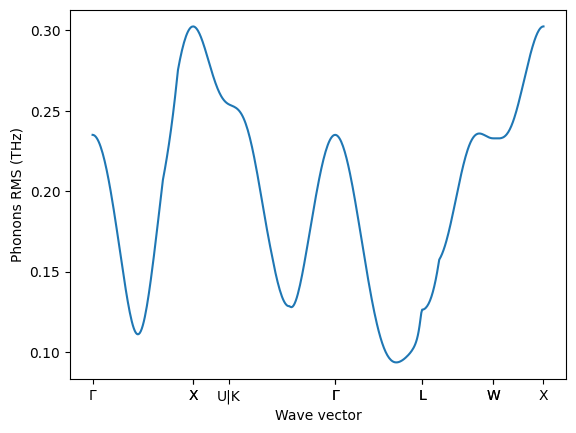

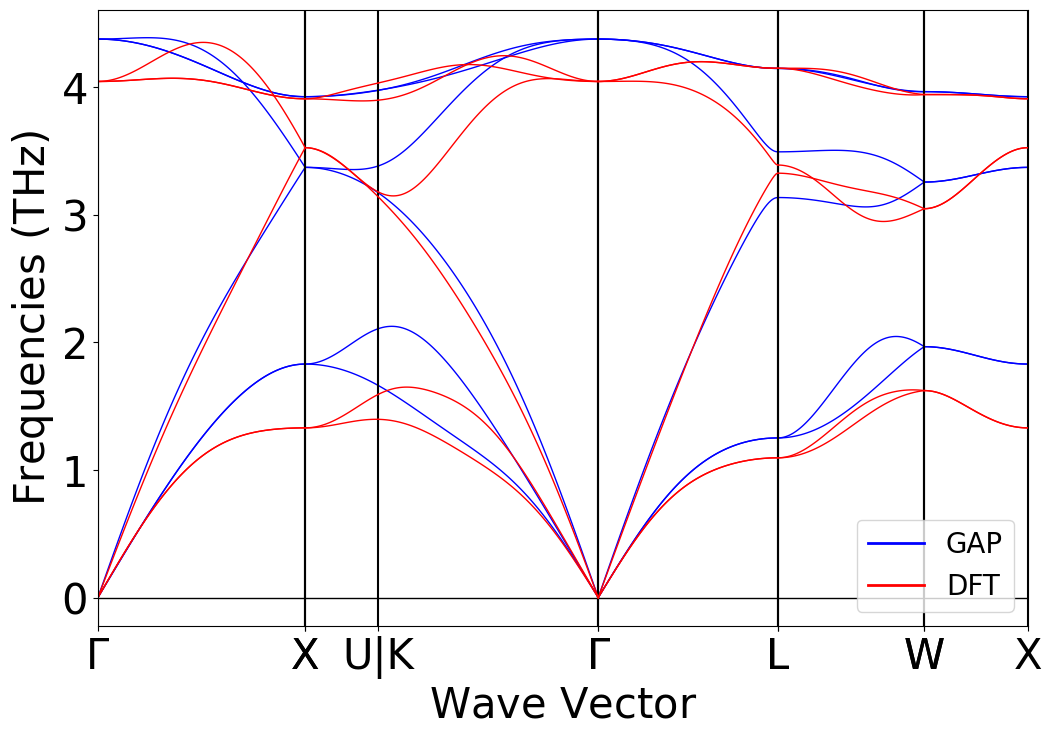

In [8]:
with mock_vasp(ref_paths=ref_paths, clean_folders=False) as mf:
    run_locally(
        autoplex_flow,
        create_folders=True,
        ensure_success=True,
        raise_immediately=True,
    )